In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [27]:
# Set the paths to your dataset
real_images_path = "C:/Users/91807/Downloads/Deepfake/Dataset/Train/Real"
fake_images_path = "C:/Users/91807/Downloads/Deepfake/Dataset/Train/Fake"

# Define constants
img_size = (128, 128)
batch_size = 32


#epochs = 10
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='min')

callbacks_list = [early_stopping, reduce_lr]

history = model.fit(
    train_generator,
    epochs=20,  # Increased epochs with early stopping in place
    validation_data=test_generator,
    callbacks=callbacks_list
)

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
    rescale=1./255  # Normalize pixel values to [0, 1]
)

# Data generator for the testing set (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)



Epoch 1/50
20/60 [=========>....................] - ETA: 23s - loss: 0.4364 - accuracy: 0.8079

KeyboardInterrupt: 

In [21]:
# Create data generators
train_generator = train_datagen.flow_from_directory(
    "C:/Users/91807/Downloads/Deepfake/Dataset/Train",  # replace with the path to your training directory
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    "C:/Users/91807/Downloads/Deepfake/Dataset/Test",  # replace with the path to your testing directory
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)



Found 1910 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


In [22]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))



Epoch 1/10
60/60 [==============================] - ETA: 0s - loss: 0.6662 - accuracy: 0.5906
Epoch 1: val_accuracy improved from -inf to 0.78278, saving model to best_model.h5
60/60 [==============================] - 40s 649ms/step - loss: 0.6662 - accuracy: 0.5906 - val_loss: 0.5760 - val_accuracy: 0.7828
Epoch 2/10
60/60 [==============================] - ETA: 0s - loss: 0.5783 - accuracy: 0.7293
Epoch 2: val_accuracy improved from 0.78278 to 0.79580, saving model to best_model.h5
60/60 [==============================] - 37s 618ms/step - loss: 0.5783 - accuracy: 0.7293 - val_loss: 0.4745 - val_accuracy: 0.7958
Epoch 3/10
60/60 [==============================] - ETA: 0s - loss: 0.5291 - accuracy: 0.7492
Epoch 3: val_accuracy improved from 0.79580 to 0.82482, saving model to best_model.h5
60/60 [==============================] - 37s 616ms/step - loss: 0.5291 - accuracy: 0.7492 - val_loss: 0.4375 - val_accuracy: 0.8248
Epoch 4/10
60/60 [==============================] - ETA: 0s - loss:

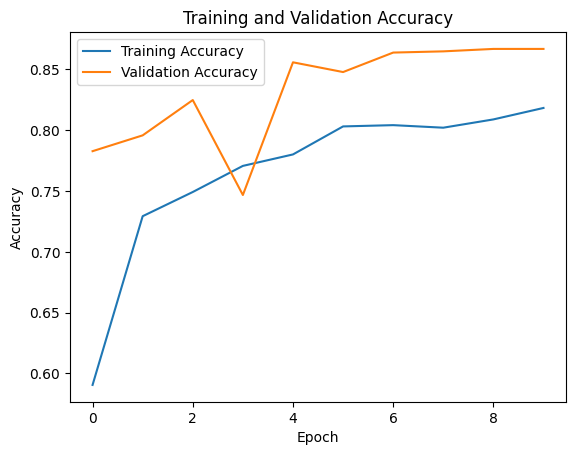

In [23]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Define a ModelCheckpoint callback to save the best model during training
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

# Train the model using the data generators
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    callbacks=[checkpoint]
)

# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

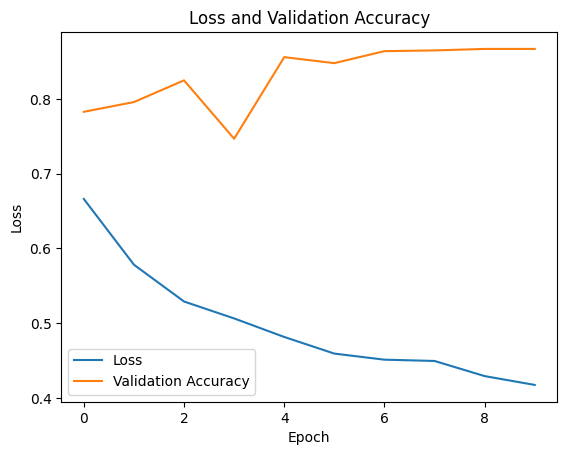

In [24]:
# Plot the training history
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Loss and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [13]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Function to load and prepare the image in right shape
def load_and_prepare_image(image_path):
    img = image.load_img(image_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add the batch dimension
    img_array /= 255.  # Normalize to [0,1]
    return img, img_array  # Return both the raw image and the processed image array



1/1 [==============================] - 0s 86ms/step
The image is classified as: Fake with a confidence of [0.42262167]


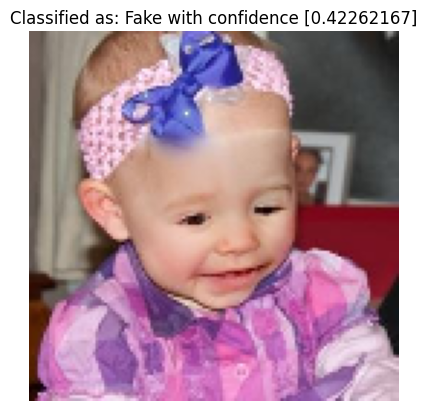

In [26]:
def predict_image_class(model, img_array):
    prediction = model.predict(img_array)
    if prediction[0] >= 0.5:  # If the model predicts a value >= 0.5, it is considered 'Real'
        return "Real", prediction[0]
    else:
        return "Fake", prediction[0]  # If the model predicts a value < 0.5, it is considered 'Fake'


# Load the saved model
model_path = 'best_model.h5'  # Update this if your model is saved with a different name or path
model = load_model(model_path)

# Ask user to input the path of the image
image_path = input("Enter the path to the image you want to classify: ")

raw_img, img_array = load_and_prepare_image(image_path)

# Predict and print the result
result, score = predict_image_class(model, img_array)
print(f"The image is classified as: {result} with a confidence of {score}")

# Display the image
plt.imshow(raw_img)
plt.title(f"Classified as: {result} with confidence {score}")
plt.axis('off')  # Hide the axis
plt.show()